In [157]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

# yolo

In [158]:
results_path = '../../model_results/yolo_augmented_exp'
dfs = {}
for folder in os.listdir(results_path):
    print(f"current experiment: {folder}")
    dfs[folder] = pd.read_csv(f'{results_path}/{folder}/results.csv').rename(columns={"Unnamed: 0":"name"})
    dfs[folder]["F1"] = 2 * ((dfs[folder]["p"] * dfs[folder]["r"]) / (dfs[folder]["p"] + dfs[folder]["r"]))
    dfs[folder]["experiment"] = folder.strip()
    dfs[folder].fillna(0, inplace=True)
print(dfs)

current experiment: -175_brightness
current experiment: 150_brightness
current experiment: 125_brightness
current experiment: -25_brightness
current experiment: 75_brightness
current experiment: 9_blur
current experiment: 0.9_salt_pepper
current experiment: 5_blur
current experiment: 6_blur
current experiment: 1_blur
current experiment: -100_brightness
current experiment: -75_brightness
current experiment: 50_brightness
current experiment: 4_blur
current experiment: -125_brightness
current experiment: block
current experiment: 0.3_salt_pepper
current experiment: 0.7_salt_pepper
current experiment: 2_blur
current experiment: 200_brightness
current experiment: -200_brightness
current experiment: 100_brightness
current experiment: stickers
current experiment: 25_brightness
current experiment: 0.8_salt_pepper
current experiment: 0.2_salt_pepper
current experiment: unaugmented
current experiment: 0.1_salt_pepper
current experiment: 0.5_salt_pepper
current experiment: 3_blur
current experime

In [159]:
test = {"A": ["-175_blur", "0.9_salt_pepper", "gaussian_noise", "block"],}
test_df = pd.DataFrame(test)
test_df["A"].str.extract('(-?\d+([.]\d+)?)', expand=False)[0]

0    -175
1     0.9
2     NaN
3     NaN
Name: 0, dtype: object

In [160]:
exps = {
    "brightness": [],
    "salt_pepper": [],
    "gaussian": [],
    "blur": [],
    "unaugmented": [],
    "block": [],
    "stickers": [],
    "avg": []
}
for key, df in dfs.items():
    for key_exps in exps.keys():
        if key_exps in key:
            df_row = df.iloc[0].copy()
            exps[key_exps].append(df_row)

for key, exp in exps.items():
    if key == "avg": continue
    df = pd.DataFrame(exp)
    # extract numbers with a regex and take only the first extraction
    df['sort'] = df['experiment'].str.extract('(-?\d+([.]\d+)?)', expand=False)[0].astype(float)
    df.columns = df.columns.str.strip()
    df['experiment'] = df['experiment'].str.strip()
    df.sort_values(by='sort', inplace=True)
    # df = df.drop('sort', axis=1)
    df.reset_index(drop=True, inplace=True)
    exps[key] = df 

print(exps)

{'brightness':    name  images  labels         p         r     map50       map        F1  \
0   all   120.0   180.0  0.053268  0.175012  0.084208  0.059701  0.081676   
1   all   120.0   180.0  0.287150  0.151267  0.106602  0.073728  0.198151   
2   all   120.0   180.0  0.719822  0.145277  0.162281  0.121063  0.241761   
3   all   120.0   180.0  0.742612  0.151813  0.192640  0.140582  0.252090   
4   all   120.0   180.0  0.496199  0.318033  0.334719  0.253903  0.387623   
5   all   120.0   180.0  0.736440  0.393006  0.461095  0.368345  0.512509   
6   all   120.0   180.0  0.795271  0.615591  0.709389  0.560327  0.693990   
7   all   120.0   180.0  0.801383  0.867839  0.909410  0.746080  0.833288   
8   all   120.0   180.0  0.934976  0.895473  0.955276  0.807986  0.914799   
9   all   120.0   180.0  0.915938  0.868049  0.943881  0.802516  0.891351   
10  all   120.0   180.0  0.836239  0.813805  0.919587  0.781942  0.824870   
11  all   120.0   180.0  0.899831  0.715201  0.870401  0.7340

In [161]:
0, 1, 2, 3
0,0 0,1
1,0 1,1

SyntaxError: invalid syntax (1089772701.py, line 2)

/tmp/ipykernel_16116/3979662096.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


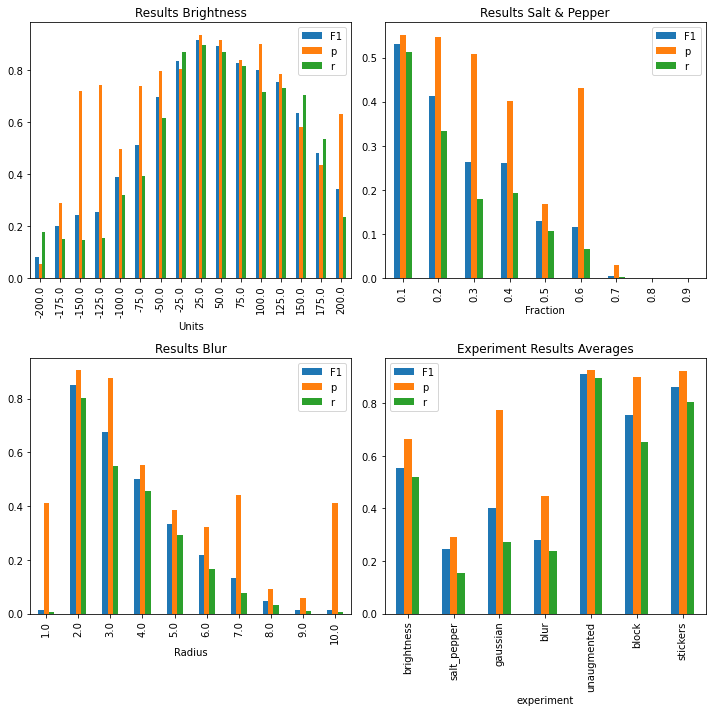

In [ ]:
avg = {
    "experiment": [],
    "p": [],
    "r": [],
    "F1": []
}
for key in exps.keys():
    if key == "avg": continue
    avg["experiment"].append(key)
    avg["p"].append(exps[key]["p"].mean())
    avg["r"].append(exps[key]["r"].mean())
    avg["F1"].append(exps[key]["F1"].mean())
avg_df = pd.DataFrame(avg)
exps["avg"] = avg_df

fig, axs = plt.subplots(2,2, figsize=(10,10))
keys = ["brightness", "salt_pepper", "blur", "avg"]
coordinates = [(0,0), (0,1), (1,0), (1,1)]
for i, key in enumerate(keys):
    df = exps[key]
    if i < 3:
        df.plot.bar(x="sort" ,y=["F1", "p", "r"], ax=axs[coordinates[i][0]][coordinates[i][1]])
    else:
        df.plot.bar(x="experiment" ,y=["F1", "p", "r"], ax=axs[coordinates[i][0]][coordinates[i][1]])
    

axs[0][0].set_title("Results Brightness")
axs[0][0].set_xlabel("Units")
axs[0][1].set_title("Results Salt & Pepper")
axs[0][1].set_xlabel("Fraction")
axs[1][0].set_title("Results Blur")
axs[1][0].set_xlabel("Radius")
axs[1][1].set_title("Experiment Results Averages")

fig.tight_layout()
fig.savefig("yolo_exps_results.pdf", bbox_inches="tight")
fig.show()


# resnet50

In [162]:
df = pd.read_csv("/home/leon/Documents/Studienarbeit/model_results/faster_rcnn_augmented/faster_rcnn_resnet_val.csv")
df

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,architecture,AP_IoU=0.50,AP_IoU=0.50:0.95,AP_IoU=0.75,AR_IoU=0.50:0.95_maxDets=1,AR_IoU=0.50:0.95_maxDets=10,AR_IoU=0.50:0.95_maxDets=100
0,faster_r-cnn_resNet50_fpn_validate_GTSDB_stickers,finished,-,lkno0705,sticker,2022-04-13T10:38:13.000Z,23,NaN,CNN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,faster_r-cnn_resNet50_fpn_validate_GTSDB_block,finished,-,lkno0705,block,2022-04-11T16:59:50.000Z,28,NaN,CNN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,faster_r-cnn_resNet50_fpn_validate_GTSDB_200_b...,finished,-,lkno0705,brightness,2022-04-11T16:59:17.000Z,23,NaN,CNN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,faster_r-cnn_resNet50_fpn_validate_GTSDB_175_b...,finished,-,lkno0705,brightness,2022-04-11T16:58:47.000Z,23,NaN,CNN,0.000343,0.000092,0.000000,0.001681,0.011239,0.023739
4,faster_r-cnn_resNet50_fpn_validate_GTSDB_150_b...,finished,-,lkno0705,brightness,2022-04-11T16:58:17.000Z,23,NaN,CNN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,faster_r-cnn_resNet50_fpn_validate_GTSDB_125_b...,finished,-,lkno0705,brightness,2022-04-11T16:57:46.000Z,23,NaN,CNN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,faster_r-cnn_resNet50_fpn_validate_GTSDB_100_b...,finished,-,lkno0705,brightness,2022-04-11T16:57:14.000Z,23,NaN,CNN,0.000034,0.000003,0.000000,0.000000,0.000512,0.000512
7,faster_r-cnn_resNet50_fpn_validate_GTSDB_75_br...,finished,-,lkno0705,brightness,2022-04-11T16:56:42.000Z,23,NaN,CNN,0.000265,0.000050,0.000000,0.000490,0.005392,0.005392
8,faster_r-cnn_resNet50_fpn_validate_GTSDB_50_br...,finished,-,lkno0705,brightness,2022-04-11T16:56:10.000Z,23,NaN,CNN,0.000220,0.000039,0.000000,0.001433,0.003973,0.005845
9,faster_r-cnn_resNet50_fpn_validate_GTSDB_25_br...,finished,-,lkno0705,brightness,2022-04-11T16:55:38.000Z,23,NaN,CNN,0.002495,0.000283,0.000000,0.002451,0.007353,0.007353


In [ ]:
ext = df['Name'].str.findall('(-?\d+([.]\d+)?)')
ext

0                                              [(50, )]
1                                              [(50, )]
2                                     [(50, ), (200, )]
3                                     [(50, ), (175, )]
4                                     [(50, ), (150, )]
5                                     [(50, ), (125, )]
6                                     [(50, ), (100, )]
7                                      [(50, ), (75, )]
8                                      [(50, ), (50, )]
9                                      [(50, ), (25, )]
10                                    [(50, ), (-25, )]
11                                    [(50, ), (-50, )]
12                                    [(50, ), (-75, )]
13                                   [(50, ), (-100, )]
14                                   [(50, ), (-125, )]
15                                   [(50, ), (-150, )]
16                                   [(50, ), (-175, )]
17                                   [(50, ), (-

In [163]:
tags = df["Tags"].unique()
df["F1"] = 2 * ((df["AP_IoU=0.50"] * df["AR_IoU=0.50:0.95_maxDets=100"]) / (df["AP_IoU=0.50"] + df["AR_IoU=0.50:0.95_maxDets=100"]))
df["F1"].fillna(0, inplace=True)
df["Name"] = df["Name"].str.replace("50", "")
df['sort'] = df['Name'].str.extract('(-?\d+([.]\d+)?)', expand=False)[0].astype(float)
df.columns = df.columns.str.strip()
df['Name'] = df['Name'].str.strip()
df.sort_values(by=['Tags','sort'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.rename(columns={"AP_IoU=0.50": "precision", "AR_IoU=0.50:0.95_maxDets=100": "recall"}, inplace=True)
df["sort"].fillna(0, inplace=True)
df["sort"] = df["sort"].round(1)
df

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,architecture,precision,AP_IoU=0.50:0.95,AP_IoU=0.75,AR_IoU=0.50:0.95_maxDets=1,AR_IoU=0.50:0.95_maxDets=10,recall,F1,sort
0,faster_r-cnn_resNet_fpn_validate_GTSDB_block,finished,-,lkno0705,block,2022-04-11T16:59:50.000Z,28,NaN,CNN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,faster_r-cnn_resNet_fpn_validate_GTSDB_1_blur,finished,-,lkno0705,blur,2022-04-11T14:16:33.000Z,26,NaN,CNN,0.000473,0.000107,0.000048,0.003743,0.007732,0.012634,0.000911,1.0
2,faster_r-cnn_resNet_fpn_validate_GTSDB_2_blur,finished,-,lkno0705,blur,2022-04-11T14:18:30.000Z,23,NaN,CNN,0.001802,0.000397,0.000000,0.008479,0.011153,0.011153,0.003102,2.0
3,faster_r-cnn_resNet_fpn_validate_GTSDB_3_blur,finished,-,lkno0705,blur,2022-04-11T14:20:21.000Z,24,NaN,CNN,0.000794,0.000079,0.000000,0.000226,0.000679,0.000679,0.000732,3.0
4,faster_r-cnn_resNet_fpn_validate_GTSDB_4_blur,finished,-,lkno0705,blur,2022-04-11T14:22:07.000Z,22,NaN,CNN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
5,faster_r-cnn_resNet_fpn_validate_GTSDB_5_blur,finished,-,lkno0705,blur,2022-04-11T14:23:47.000Z,24,NaN,CNN,0.000946,0.000241,0.000000,0.002353,0.006275,0.006275,0.001644,5.0
6,faster_r-cnn_resNet_fpn_validate_GTSDB_6_blur,finished,-,lkno0705,blur,2022-04-11T14:25:27.000Z,23,NaN,CNN,0.004932,0.000990,0.000000,0.005882,0.005882,0.008824,0.006327,6.0
7,faster_r-cnn_resNet_fpn_validate_GTSDB_7_blur,finished,-,lkno0705,blur,2022-04-11T14:27:04.000Z,25,NaN,CNN,0.000333,0.000069,0.000002,0.004412,0.007353,0.011555,0.000647,7.0
8,faster_r-cnn_resNet_fpn_validate_GTSDB_8_blur,finished,-,lkno0705,blur,2022-04-11T14:28:42.000Z,23,NaN,CNN,0.002838,0.000420,0.000000,0.001584,0.009615,0.009615,0.004382,8.0
9,faster_r-cnn_resNet_fpn_validate_GTSDB_9_blur,finished,-,lkno0705,blur,2022-04-11T14:30:17.000Z,23,NaN,CNN,0.000065,0.000014,0.000000,0.000000,0.005882,0.008824,0.000129,9.0


In [164]:
idxs = [df.loc[(df["Tags"] == "brightness") & (df["sort"] == value)].index for value in [-1.0, 1.0, 0.0]]
for i in idxs:
    df.drop(i, inplace=True)
df

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,architecture,precision,AP_IoU=0.50:0.95,AP_IoU=0.75,AR_IoU=0.50:0.95_maxDets=1,AR_IoU=0.50:0.95_maxDets=10,recall,F1,sort
0,faster_r-cnn_resNet_fpn_validate_GTSDB_block,finished,-,lkno0705,block,2022-04-11T16:59:50.000Z,28,NaN,CNN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,faster_r-cnn_resNet_fpn_validate_GTSDB_1_blur,finished,-,lkno0705,blur,2022-04-11T14:16:33.000Z,26,NaN,CNN,0.000473,0.000107,0.000048,0.003743,0.007732,0.012634,0.000911,1.0
2,faster_r-cnn_resNet_fpn_validate_GTSDB_2_blur,finished,-,lkno0705,blur,2022-04-11T14:18:30.000Z,23,NaN,CNN,0.001802,0.000397,0.000000,0.008479,0.011153,0.011153,0.003102,2.0
3,faster_r-cnn_resNet_fpn_validate_GTSDB_3_blur,finished,-,lkno0705,blur,2022-04-11T14:20:21.000Z,24,NaN,CNN,0.000794,0.000079,0.000000,0.000226,0.000679,0.000679,0.000732,3.0
4,faster_r-cnn_resNet_fpn_validate_GTSDB_4_blur,finished,-,lkno0705,blur,2022-04-11T14:22:07.000Z,22,NaN,CNN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
5,faster_r-cnn_resNet_fpn_validate_GTSDB_5_blur,finished,-,lkno0705,blur,2022-04-11T14:23:47.000Z,24,NaN,CNN,0.000946,0.000241,0.000000,0.002353,0.006275,0.006275,0.001644,5.0
6,faster_r-cnn_resNet_fpn_validate_GTSDB_6_blur,finished,-,lkno0705,blur,2022-04-11T14:25:27.000Z,23,NaN,CNN,0.004932,0.000990,0.000000,0.005882,0.005882,0.008824,0.006327,6.0
7,faster_r-cnn_resNet_fpn_validate_GTSDB_7_blur,finished,-,lkno0705,blur,2022-04-11T14:27:04.000Z,25,NaN,CNN,0.000333,0.000069,0.000002,0.004412,0.007353,0.011555,0.000647,7.0
8,faster_r-cnn_resNet_fpn_validate_GTSDB_8_blur,finished,-,lkno0705,blur,2022-04-11T14:28:42.000Z,23,NaN,CNN,0.002838,0.000420,0.000000,0.001584,0.009615,0.009615,0.004382,8.0
9,faster_r-cnn_resNet_fpn_validate_GTSDB_9_blur,finished,-,lkno0705,blur,2022-04-11T14:30:17.000Z,23,NaN,CNN,0.000065,0.000014,0.000000,0.000000,0.005882,0.008824,0.000129,9.0


In [165]:
groups = df.groupby("Tags")
groups.get_group("salt_pepper")

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,architecture,precision,AP_IoU=0.50:0.95,AP_IoU=0.75,AR_IoU=0.50:0.95_maxDets=1,AR_IoU=0.50:0.95_maxDets=10,recall,F1,sort
29,faster_r-cnn_resNet_fpn_validate_GTSDB_0.1_sal...,finished,-,lkno0705,salt_pepper,2022-04-11T14:35:23.000Z,23,NaN,CNN,0.001236,0.000263,0.000086,0.000000,0.005707,0.005707,0.002031,0.1
30,faster_r-cnn_resNet_fpn_validate_GTSDB_0.2_sal...,finished,-,lkno0705,salt_pepper,2022-04-11T14:40:20.000Z,24,NaN,CNN,0.002591,0.000703,0.000127,0.010110,0.010951,0.010951,0.004191,0.2
31,faster_r-cnn_resNet_fpn_validate_GTSDB_0.30000...,finished,-,lkno0705,salt_pepper,2022-04-11T14:47:51.000Z,24,NaN,CNN,0.000115,0.000016,0.000000,0.000000,0.003620,0.008371,0.000227,0.3
32,faster_r-cnn_resNet_fpn_validate_GTSDB_0.4_sal...,finished,-,lkno0705,salt_pepper,2022-04-11T14:57:58.000Z,25,NaN,CNN,0.002086,0.000412,0.000000,0.003846,0.015385,0.015385,0.003674,0.4
33,faster_r-cnn_resNet_fpn_validate_GTSDB_0.5_sal...,finished,-,lkno0705,salt_pepper,2022-04-11T15:11:09.000Z,25,NaN,CNN,0.000025,0.000003,0.000000,0.000000,0.000490,0.000490,0.000048,0.5
34,faster_r-cnn_resNet_fpn_validate_GTSDB_0.60000...,finished,-,lkno0705,salt_pepper,2022-04-11T15:27:50.000Z,23,NaN,CNN,0.000175,0.000017,0.000000,0.000000,0.003922,0.003922,0.000335,0.6
35,faster_r-cnn_resNet_fpn_validate_GTSDB_0.70000...,finished,-,lkno0705,salt_pepper,2022-04-11T15:48:42.000Z,23,NaN,CNN,0.001725,0.000489,0.000000,0.003620,0.004525,0.004525,0.002498,0.7
36,faster_r-cnn_resNet_fpn_validate_GTSDB_0.8_sal...,finished,-,lkno0705,salt_pepper,2022-04-11T16:15:19.000Z,22,NaN,CNN,0.004734,0.000922,0.000000,0.003676,0.015441,0.015441,0.007247,0.8
37,faster_r-cnn_resNet_fpn_validate_GTSDB_0.9_sal...,finished,-,lkno0705,salt_pepper,2022-04-11T16:50:43.000Z,23,NaN,CNN,0.002912,0.000291,0.000000,0.000267,0.000267,0.000267,0.000490,0.9


In [166]:
avg = {
    "experiment": [],
    "precision": [],
    "recall": [],
    "F1": []
}
for tag in tags:
    avg["experiment"].append(tag)
    avg["precision"].append(groups.get_group(tag)["precision"].mean())
    avg["recall"].append(groups.get_group(tag)["recall"].mean())
    avg["F1"].append(groups.get_group(tag)["F1"].mean())
avg_df = pd.DataFrame(avg)
avg_df

,experiment,precision,recall,F1
0,sticker,0.000000,0.000000,0.000000
1,block,0.000000,0.000000,0.000000
2,brightness,0.000594,0.005730,0.000968
3,salt_pepper,0.001733,0.007229,0.002304
4,gaussian_noise,0.000000,0.000000,0.000000
5,blur,0.001218,0.006956,0.001787
6,reference,0.000253,0.006952,0.000487


/tmp/ipykernel_16116/826058402.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


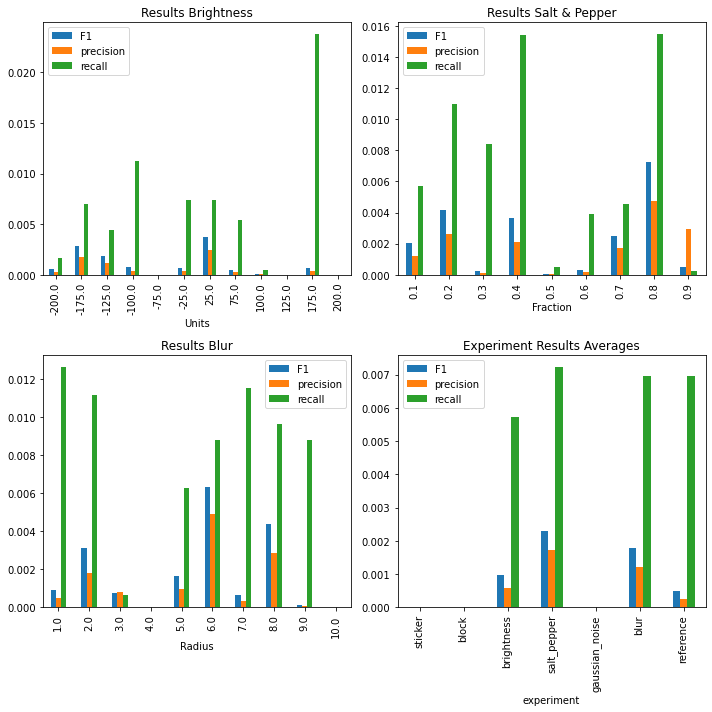

In [167]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
coordinates = [(0,0), (0,1), (1,0), (1,1)]
keys = ["brightness", "salt_pepper", "blur", "avg"]
for i, key in enumerate(keys):
    if key == "avg":
        avg_df.plot.bar(x="experiment" ,y=["F1", "precision", "recall"], ax=axs[coordinates[i][0]][coordinates[i][1]])
    else:
        tmp_df = groups.get_group(key)
        tmp_df.plot.bar(x="sort" ,y=["F1", "precision", "recall"], ax=axs[coordinates[i][0]][coordinates[i][1]])

axs[0][0].set_title("Results Brightness")
axs[0][0].set_xlabel("Units")
axs[0][1].set_title("Results Salt & Pepper")
axs[0][1].set_xlabel("Fraction")
axs[1][0].set_title("Results Blur")
axs[1][0].set_xlabel("Radius")
axs[1][1].set_title("Experiment Results Averages")

fig.tight_layout()
fig.savefig("resnet_exps_results.pdf", bbox_inches="tight")
fig.show()

# mobilenet

In [ ]:
df = pd.read_csv("/home/leon/Documents/Studienarbeit/model_results/faster_rcnn_augmented/faster_rcnn_mobilenet_val.csv")
df

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,architecture,AP_IoU=0.50,AP_IoU=0.50:0.95,AP_IoU=0.75,AR_IoU=0.50:0.95_maxDets=1,AR_IoU=0.50:0.95_maxDets=10,AR_IoU=0.50:0.95_maxDets=100
0,faster_r-cnn_mobilenet_v3_large_320_fpn_valida...,finished,-,lkno0705,sticker,2022-04-13T10:37:44.000Z,19,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000
1,faster_r-cnn_mobilenet_v3_large_320_fpn_valida...,finished,-,lkno0705,block,2022-04-11T11:40:04.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000
2,faster_r-cnn_mobilenet_v3_large_320_fpn_valida...,finished,-,lkno0705,brightness,2022-04-11T11:39:38.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000
3,faster_r-cnn_mobilenet_v3_large_320_fpn_valida...,finished,-,lkno0705,brightness,2022-04-11T11:39:13.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000
4,faster_r-cnn_mobilenet_v3_large_320_fpn_valida...,finished,-,lkno0705,brightness,2022-04-11T11:38:44.000Z,19,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000
5,faster_r-cnn_mobilenet_v3_large_320_fpn_valida...,finished,-,lkno0705,brightness,2022-04-11T11:38:18.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000
6,faster_r-cnn_mobilenet_v3_large_320_fpn_valida...,finished,-,lkno0705,brightness,2022-04-11T11:37:51.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000
7,faster_r-cnn_mobilenet_v3_large_320_fpn_valida...,finished,-,lkno0705,brightness,2022-04-11T11:37:25.000Z,18,NaN,CNN,0.000027,0.000003,0,0.00000,0.000420,0.000420
8,faster_r-cnn_mobilenet_v3_large_320_fpn_valida...,finished,-,lkno0705,brightness,2022-04-11T11:36:59.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000
9,faster_r-cnn_mobilenet_v3_large_320_fpn_valida...,finished,-,lkno0705,brightness,2022-04-11T11:36:31.000Z,19,NaN,CNN,0.000062,0.000006,0,0.00000,0.000184,0.000184


In [ ]:
tags = df["Tags"].unique()
df["F1"] = 2 * ((df["AP_IoU=0.50"] * df["AR_IoU=0.50:0.95_maxDets=100"]) / (df["AP_IoU=0.50"] + df["AR_IoU=0.50:0.95_maxDets=100"]))
df["F1"].fillna(0, inplace=True)
df["Name"] = df["Name"].str.replace("3|20", "")
df['sort'] = df['Name'].str.extract('(-?\d+([.]\d+)?)', expand=False)[0].astype(float)
df.columns = df.columns.str.strip()
df['Name'] = df['Name'].str.strip()
df.sort_values(by=['Tags','sort'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.rename(columns={"AP_IoU=0.50": "precision", "AR_IoU=0.50:0.95_maxDets=100": "recall"}, inplace=True)
df["sort"].fillna(0, inplace=True)
df["sort"] = df["sort"].round(1)
df

/tmp/ipykernel_16116/1629558257.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Name"] = df["Name"].str.replace("3|20", "")


,Name,State,Notes,User,Tags,Created,Runtime,Sweep,architecture,precision,AP_IoU=0.50:0.95,AP_IoU=0.75,AR_IoU=0.50:0.95_maxDets=1,AR_IoU=0.50:0.95_maxDets=10,recall,F1,sort
0,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,block,2022-04-11T11:40:04.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,0.0
1,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:05:56.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,1.0
2,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:07:44.000Z,19,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,2.0
3,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:11:07.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,4.0
4,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:12:43.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,5.0
5,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:14:17.000Z,17,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,6.0
6,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:15:48.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,7.0
7,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:17:18.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,8.0
8,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:18:47.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,9.0
9,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:20:16.000Z,18,NaN,CNN,0.003094,0.000309,0,0.00049,0.001961,0.001961,0.002400,10.0


In [ ]:
idxs = [df.loc[(df["Tags"] == "brightness") & (df["sort"] == value)].index for value in [0.0]]
idxs = idxs + [df.loc[(df["Tags"] == "blur") & (df["sort"] == value)].index for value in [0.0]]
idxs = idxs + [df.loc[(df["Tags"] == "salt_pepper") & (df["sort"] == value)].index for value in [0.0]]
print(idxs)
for i in idxs:
    df.drop(i, inplace=True)
df

[Int64Index([18, 19], dtype='int64'), Int64Index([10], dtype='int64'), Int64Index([29], dtype='int64')]


,Name,State,Notes,User,Tags,Created,Runtime,Sweep,architecture,precision,AP_IoU=0.50:0.95,AP_IoU=0.75,AR_IoU=0.50:0.95_maxDets=1,AR_IoU=0.50:0.95_maxDets=10,recall,F1,sort
0,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,block,2022-04-11T11:40:04.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,0.0
1,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:05:56.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,1.0
2,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:07:44.000Z,19,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,2.0
3,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:11:07.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,4.0
4,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:12:43.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,5.0
5,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:14:17.000Z,17,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,6.0
6,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:15:48.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,7.0
7,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:17:18.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,8.0
8,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:18:47.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.000000,0.000000,0.000000,9.0
9,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,blur,2022-04-11T09:20:16.000Z,18,NaN,CNN,0.003094,0.000309,0,0.00049,0.001961,0.001961,0.002400,10.0


In [ ]:
groups = df.groupby("Tags")
groups.get_group("salt_pepper")

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,architecture,precision,AP_IoU=0.50:0.95,AP_IoU=0.75,AR_IoU=0.50:0.95_maxDets=1,AR_IoU=0.50:0.95_maxDets=10,recall,F1,sort
30,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,salt_pepper,2022-04-11T09:23:23.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.00000,0.00000,0.000000,0.1
31,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,salt_pepper,2022-04-11T09:28:01.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.00000,0.00000,0.000000,0.2
32,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,salt_pepper,2022-04-11T09:44:34.000Z,17,NaN,CNN,0.000000,0.000000,0,0.00000,0.00000,0.00000,0.000000,0.4
33,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,salt_pepper,2022-04-11T09:57:05.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.00000,0.00000,0.000000,0.5
34,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,salt_pepper,2022-04-11T10:12:53.000Z,18,NaN,CNN,0.000655,0.000131,0,0.00049,0.00049,0.00049,0.000561,0.6
35,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,salt_pepper,2022-04-11T10:32:54.000Z,19,NaN,CNN,0.000000,0.000000,0,0.00000,0.00000,0.00000,0.000000,0.7
36,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,salt_pepper,2022-04-11T10:58:26.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.00000,0.00000,0.000000,0.8
37,faster_r-cnn_mobilenet_v_large__fpn_validate_G...,finished,-,lkno0705,salt_pepper,2022-04-11T11:32:27.000Z,18,NaN,CNN,0.000000,0.000000,0,0.00000,0.00000,0.00000,0.000000,0.9


In [ ]:
avg = {
    "experiment": [],
    "precision": [],
    "recall": [],
    "F1": []
}
for tag in tags:
    avg["experiment"].append(tag)
    avg["precision"].append(groups.get_group(tag)["precision"].mean())
    avg["recall"].append(groups.get_group(tag)["recall"].mean())
    avg["F1"].append(groups.get_group(tag)["F1"].mean())
avg_df = pd.DataFrame(avg)
avg_df

,experiment,precision,recall,F1
0,sticker,0.000000,0.000000,0.000000
1,block,0.000000,0.000000,0.000000
2,brightness,0.000055,0.000148,0.000074
3,salt_pepper,0.000082,0.000061,0.000070
4,gaussian_noise,0.000000,0.000000,0.000000
5,blur,0.000344,0.000218,0.000267
6,ref,0.000000,0.000000,0.000000


/tmp/ipykernel_16116/60710692.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


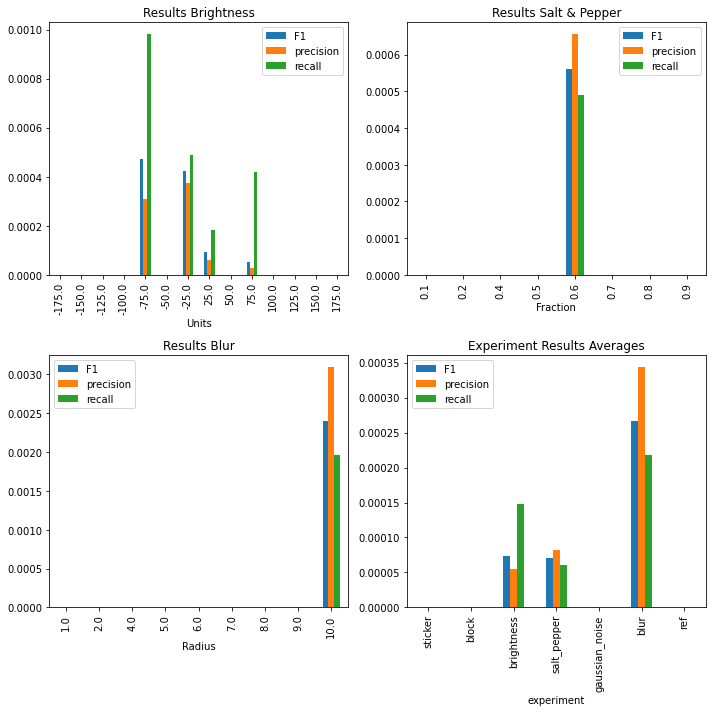

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
coordinates = [(0,0), (0,1), (1,0), (1,1)]
keys = ["brightness", "salt_pepper", "blur", "avg"]
for i, key in enumerate(keys):
    if key == "avg":
        avg_df.plot.bar(x="experiment" ,y=["F1", "precision", "recall"], ax=axs[coordinates[i][0]][coordinates[i][1]])
    else:
        tmp_df = groups.get_group(key)
        tmp_df.plot.bar(x="sort" ,y=["F1", "precision", "recall"], ax=axs[coordinates[i][0]][coordinates[i][1]])

axs[0][0].set_title("Results Brightness")
axs[0][0].set_xlabel("Units")
axs[0][1].set_title("Results Salt & Pepper")
axs[0][1].set_xlabel("Fraction")
axs[1][0].set_title("Results Blur")
axs[1][0].set_xlabel("Radius")
axs[1][1].set_title("Experiment Results Averages")

fig.tight_layout()
fig.savefig("mobileNet_exps_results.pdf", bbox_inches="tight")
fig.show()